In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
%matplotlib inline


In [2]:
# df = pd.read_excel("Topics_stars10000_project_keyword.xlsx") #star>10000개가 있는 Df
df = pd.read_excel("Topics_keywords.xlsx")   # vehicle Data가 들은 Df
df.drop_duplicates(['project_name'])
df.head(50)

,project_name,topic_keyword
0,ApolloAuto/apollo,"['apollo', 'self-driving-car', 'autonomous-dri..."
1,AtsushiSakai/PythonRobotics,"['python', 'algorithm', 'control', 'robot', 'l..."
2,microsoft/AirSim,"['simulator', 'research', 'ai', 'computer-visi..."
3,carla-simulator/carla,"['simulator', 'research', 'ai', 'computer-visi..."
4,Autoware-AI/autoware.ai,"['planner', 'detection', 'ros', 'calibration',..."
5,microsoft/AutonomousDrivingCookbook,"['microsoft', 'car', 'tutorial', 'deep-learnin..."
6,manfreddiaz/awesome-autonomous-vehicles,"['computer-vision', 'deep-learning', 'autonomo..."
7,cyberbotics/webots,"['open-source', 'multi-platform', 'simulator',..."
8,generalized-intelligence/GAAS,"['aviation', 'uav', 'drone', 'flight-controlle..."
9,daohu527/dig-into-apollo,"['tutorial', 'self-driving-car', 'cyber', 'aut..."


In [3]:
# for i in topic_dic:
#     if 'active' in i[0]:
#         print("'{}'".format(i[0]),end=",")

In [4]:
# topic_dic[1500:]

In [5]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
print(len(target),len(string_list))
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

for i in range(len(target)):
    print(target[i],string_list[i])

139 139
machinelearning ['machinelearning-python', 'ml', 'machine-translation', 'machine-learning-from-scratch', 'machine-learning-algorithms', 'machine-learning']
package ['packages', 'package-manager', 'packaging']
zsh ['zsh-theme', 'zsh-prompt', 'zsh-configuration', 'zsh-autosuggestions']
zerossl ['zero-copy', 'zero-configuration']
youtube ['youtube-live']
xcode ['xcode10']
x64 ['x86-64', 'x86']
wysiwyg ['wysiwyg-editor']
workflow ['workflow-automation', 'works-with-clojurescript', 'works-with-codespaces', 'works-with-construct', 'works-with-elm', 'works-with-flutter', 'works-with-gatsby', 'works-with-mint', 'works-with-phaser', 'works-with-react', 'works-with-reason', 'works-with-svelte', 'works-with-vue', 'works-with-yew']
windows ['windowing', 'windows-10', 'windows-console', 'windows-terminal', 'windowscontainers']
weixin ['weixin-plugin']
wechat ['wechat-macos', 'wechat-mini-program', 'wechat-plugin', 'wechat-weapp']
web ['webxr', 'webworkers', 'webview', 'webtorrent', 'webstor

In [6]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
result = []
topic_dic = {}
for idx,j in enumerate(df['topic_keyword']):
    i_list = j.replace("[","").replace("]","").replace("'","").split(",")
    i_list = [i.strip() for i in i_list]
    df['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
# print(topic_dic['standard'])
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 5
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
# topic_list = [i[0] for i in topic_dic]
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic


[('automation', 209),
 ('self-driving-car', 46),
 ('deep-learning', 40),
 ('ros', 27),
 ('computer-vision', 24),
 ('robotics', 21),
 ('python', 18),
 ('detection', 15),
 ('machinelearning', 15),
 ('autonomous-car', 13),
 ('convolutional-neural-networks', 11),
 ('simulator', 10),
 ('neural', 10),
 ('open-source', 9),
 ('lane-detection', 9),
 ('reinforcement-learning', 9),
 ('artificial-intelligence', 8),
 ('tensorflow', 8),
 ('pytorch', 8),
 ('awesome', 8),
 ('slam', 7),
 ('carla', 7),
 ('carla-simulator', 7),
 ('simulation', 7),
 ('robot', 6),
 ('lidar', 6),
 ('cnn', 6),
 ('autonomous-navigation', 5),
 ('ai', 5),
 ('autonomous', 5),
 ('lane-finding', 5),
 ('lane-detector', 5),
 ('localization', 4),
 ('path-planning', 4),
 ('control-systems', 4),
 ('imitation-learning', 4),
 ('tutorial', 4),
 ('keras', 4),
 ('cpp', 4),
 ('lidar-point-cloud', 4),
 ('mpc', 4),
 ('segmentation', 4),
 ('kitti-dataset', 4),
 ('3d-object-detection', 4),
 ('motion-planning', 4),
 ('vision', 4),
 ('sensor-fusio

In [7]:
# 위 과정들을 통해 얻은 토픽들을 통해 칼럼을 만듬
df_vector = pd.DataFrame(topic_list).transpose()
df_vector

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,automation,self-driving-car,deep-learning,ros,computer-vision,robotics,python,detection,machinelearning,autonomous-car,...,carla,carla-simulator,simulation,robot,lidar,cnn,autonomous-navigation,ai,autonomous,lane-finding


In [8]:
topic_dic_df = {}
for i in topic_list:
    topic_dic_df[i]=0
topic_list

['automation',
 'self-driving-car',
 'deep-learning',
 'ros',
 'computer-vision',
 'robotics',
 'python',
 'detection',
 'machinelearning',
 'autonomous-car',
 'convolutional-neural-networks',
 'simulator',
 'neural',
 'open-source',
 'lane-detection',
 'reinforcement-learning',
 'artificial-intelligence',
 'tensorflow',
 'pytorch',
 'awesome',
 'slam',
 'carla',
 'carla-simulator',
 'simulation',
 'robot',
 'lidar',
 'cnn',
 'autonomous-navigation',
 'ai',
 'autonomous',
 'lane-finding']

In [9]:
# 토픽들을 칼럼으로 가지는 각각의 패키지 별로 벡터를 만들고 모든 성분을 0으로 채움
df_vector = pd.DataFrame(result,index=df['project_name'],columns=topic_list).fillna(0)
df_vector

,automation,self-driving-car,deep-learning,ros,computer-vision,robotics,python,detection,machinelearning,autonomous-car,...,carla,carla-simulator,simulation,robot,lidar,cnn,autonomous-navigation,ai,autonomous,lane-finding
project_name,,,,,,,,,,,,,,,,,,,,,
ApolloAuto/apollo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AtsushiSakai/PythonRobotics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
microsoft/AirSim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
carla-simulator/carla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Autoware-AI/autoware.ai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mohamedameen93/Lane-lines-detection-using-Python-and-OpenCV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JerryIshihara/lyft-motion-prediction-for-autonomous-vehicle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
thayerAlshaabi/DeepEye,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# 각 패키지 별로 가지고있는 토픽을 +1 씩 하여 각 패키지의 벡터를 생성함
for idx,topics in enumerate(df['topic_keyword']):
    for topic in topics:
        if topic in topic_list:
            topic = same_things(topic)
            df_vector.loc[df['project_name'][idx],topic] += 1
df_vector

,automation,self-driving-car,deep-learning,ros,computer-vision,robotics,python,detection,machinelearning,autonomous-car,...,carla,carla-simulator,simulation,robot,lidar,cnn,autonomous-navigation,ai,autonomous,lane-finding
project_name,,,,,,,,,,,,,,,,,,,,,
ApolloAuto/apollo,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AtsushiSakai/PythonRobotics,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
microsoft/AirSim,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
carla-simulator/carla,0,1,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
Autoware-AI/autoware.ai,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mohamedameen93/Lane-lines-detection-using-Python-and-OpenCV,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JerryIshihara/lyft-motion-prediction-for-autonomous-vehicle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
thayerAlshaabi/DeepEye,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_vector.to_excel("packages_vectors.xlsx",index=False)

In [12]:
# 상관행렬을 이용하기 위한 표준화계수로 만들기 위해 scaling
# 선 PCA를 수행해주기 전에 변수들의 단위를 표준화시켜주어야 한다. 즉, PCA 수행 시 상관행렬을 이용해 표준화계수로 만들어준 후 PCA를 수행.
# from sklearn.preprocessing import StandardScaler

# std_df = StandardScaler().fit_transform(df_vector)
# std_df = pd.DataFrame(std_df, index=df_vector.index, columns=df_vector.columns)
# df_vector = std_df
# df_vector.head()

In [13]:
df_vector.shape

(150, 31)

In [14]:
# 차원축소를 하지 않고도 PCA를 돌려봐보기

# 정보량이 95% 인 만큼의 칼럼수가 134임
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_vector)
df_pca = pd.DataFrame(df_pca, index=df_vector.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

,pca1,pca2
project_name,,
ApolloAuto/apollo,-0.385696,-0.654262
AtsushiSakai/PythonRobotics,-0.063559,0.763156
microsoft/AirSim,0.166467,-0.912841
carla-simulator/carla,0.860780,-0.896068
Autoware-AI/autoware.ai,-0.331135,0.516879
...,...,...
mohamedameen93/Lane-lines-detection-using-Python-and-OpenCV,0.379460,0.146136
JerryIshihara/lyft-motion-prediction-for-autonomous-vehicle,-0.249066,0.180085
thayerAlshaabi/DeepEye,0.816642,-0.034466


In [15]:
df_pca.shape

(150, 2)

In [16]:
np.array(df_pca)[:,0]

array([-0.38569617, -0.06355888,  0.16646683,  0.86077953, -0.33113533,
        0.6251851 ,  0.81664208, -0.03971208, -0.3318622 , -0.38569617,
       -0.06938062, -0.35014644,  0.96484446, -0.24906568, -0.4357168 ,
       -0.39324765, -0.24906568, -0.25462153,  0.80353484, -0.05825632,
       -0.32958309, -0.24906568, -0.37042577, -0.39222942, -0.39319635,
       -0.24906568, -0.3972041 , -0.32958309,  1.86451457,  0.48920222,
       -0.37374904, -0.24832845, -0.38569617, -0.24906568,  0.82391255,
       -0.38569617, -0.30330713,  0.78631021,  0.70411612, -0.32231229,
        0.42745802, -0.43914144, -0.39222942, -0.38569617, -0.30250029,
       -0.14622985, -0.25559892, -0.56326471, -0.28939305,  0.12854052,
        0.54289782, -0.33703921, -0.24906568,  0.981097  , -0.24906568,
       -0.38569617, -0.24906568, -0.38569617,  0.05224535, -0.24906568,
        0.07837418, -0.3714627 ,  0.80323673, -0.24906568, -0.38569617,
       -0.24906568,  1.06191034, -0.16072765, -0.24906568,  0.04

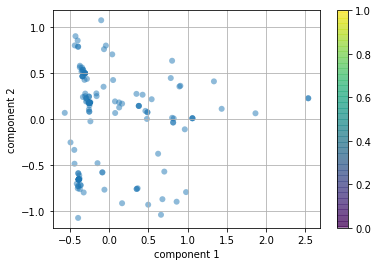

In [17]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1],
            edgecolor='none', alpha=0.5, cmap='tab10')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [18]:
# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
pca.explained_variance_ratio_.sum()

0.28220502299241473

In [19]:
# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(df_vector)

In [20]:
# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
pca_temp.n_components_

21

In [21]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,0.314193,0.158258,0.158258
pca2,0.246075,0.123947,0.282205


In [43]:
# Instantiate the clustering model 
# n_init : 랜덤한 초기값을 몇번이나 다르게 설정해서 돌릴건지
# max_iter=300 : iteration을 반복적으로 수행하면 서 좋을 결과로 수렴하게되는데 그 횟수를 몇번 할 것인지
# verbose : 계산과정 보여줌 0,1,2 이렇게 해서 보여주는 정보의 양을 조절 할 수있음

# 15개의 클러스터를 만들기 
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

KMeans(n_clusters=4)

In [44]:
# 모델에 fitting 하기
kmeans.fit(df_pca)

KMeans(n_clusters=4)

In [45]:
y_kmeans = kmeans.predict(df_pca)
y_kmeans # 군집화 된 결과

array([1, 2, 1, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 3, 0, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2,
       0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2,
       1, 3, 3, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 2, 2, 2, 1, 0, 1, 2, 1, 2,
       1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 1, 2], dtype=int32)

In [46]:
# 군집의 중심
kmeans.cluster_centers_

array([[ 0.7520614 ,  0.00598345],
       [-0.24210638, -0.67907106],
       [-0.24439215,  0.33929527],
       [ 2.31235408,  0.1747637 ]])

In [47]:
kmeans.labels_[0:8]

array([1, 2, 1, 0, 2, 0, 0, 2], dtype=int32)

In [48]:
y_kmeans[:5]

array([1, 2, 1, 0, 2], dtype=int32)

In [49]:
# 클러스터링의 성능측정
# 값이 높을 수록 좋음
kmeans.inertia_

16.51577792664085

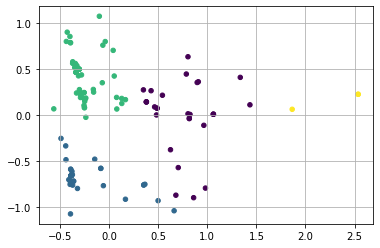

In [50]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
# plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()

In [51]:
np.array(df_pca)

array([[-0.38569617, -0.6542618 ],
       [-0.06355888,  0.76315581],
       [ 0.16646683, -0.91284088],
       [ 0.86077953, -0.89606793],
       [-0.33113533,  0.51687867],
       [ 0.6251851 , -0.3742199 ],
       [ 0.81664208, -0.03446606],
       [-0.03971208,  0.80289809],
       [-0.3318622 ,  0.24298989],
       [-0.38569617, -0.6542618 ],
       [-0.06938062,  0.35470687],
       [-0.35014644,  0.51948988],
       [ 0.96484446, -0.1085709 ],
       [-0.24906568,  0.18008541],
       [-0.4357168 ,  0.80413462],
       [-0.39324765,  0.79030385],
       [-0.24906568,  0.18008541],
       [-0.25462153,  0.24762328],
       [ 0.80353484,  0.01654561],
       [-0.05825632, -0.76540964],
       [-0.32958309,  0.54010078],
       [-0.24906568,  0.18008541],
       [-0.37042577,  0.58310733],
       [-0.39222942, -0.72658408],
       [-0.39319635, -1.07260856],
       [-0.24906568,  0.18008541],
       [-0.3972041 , -0.75143205],
       [-0.32958309,  0.54010078],
       [ 1.86451457,

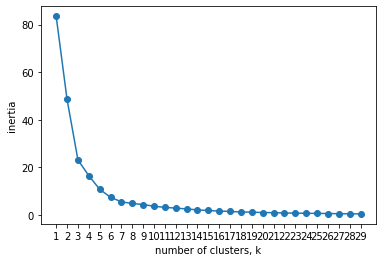

In [52]:
ks = range(1,30)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [53]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df['project_name'][idx]]
    else:
        clustered_dic[i].append(df['project_name'][idx])
clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
clustered_dic

[(0,
  ['carla-simulator/carla',
   'microsoft/AutonomousDrivingCookbook',
   'manfreddiaz/awesome-autonomous-vehicles',
   'jiachenli94/Awesome-Interaction-aware-Trajectory-Prediction',
   'AndreiBarsan/DynSLAM',
   'StanfordASL/Trajectron-plus-plus',
   'ika-rwth-aachen/Cam2BEV',
   'datlife/jetson-car',
   'sigmaai/self-driving-golf-cart',
   'dotchen/LearningByCheating',
   'jiachenli94/Awesome-Decision-Making-Reinforcement-Learning',
   'MankaranSingh/Auto-Birds-Eye',
   'fabvio/ld-lsi',
   'ndrplz/dreyeve',
   'fabvio/Cascade-LD',
   'fabvio/TuSimple-lane-classes',
   'anshulpaigwar/GndNet',
   'ahmdtaha/constrained_attention_filter',
   'lgsvl/lanefollowing',
   'javiermcebrian/glcapsnet',
   'kenshiro-o/CarND-Advanced-Lane-Lines',
   'cfizette/road-sign-cascades',
   'IvLabs/Stair-Climber',
   'tj27-vkr/Monocular-Vehicle-Localization',
   'datacluster-labs/Datacluster-Datasets',
   'singlavinod/Self-Driving-Car-NanoDegree-Udacity',
   'bborja/wasr_network',
   'mohamedameen93/L

In [54]:
df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num

In [55]:
# 군집화된 패키지들은 어떤 토픽들을 가지고 있을까?

topic_clustered_list = []
for i in df_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_clustered_list.append(temp_dic[:15])
topic_clustered_list

[[('automation', 42),
  ('deep-learning', 26),
  ('computer-vision', 15),
  ('convolutional-neural-networks', 10),
  ('machinelearning', 7),
  ('python', 6),
  ('artificial-intelligence', 5),
  ('ros', 5),
  ('self-driving-car', 5),
  ('tensorflow', 5),
  ('neural', 5),
  ('keras', 4),
  ('cnn', 4),
  ('carla', 3),
  ('robotics', 3)],
 [('automation', 58),
  ('self-driving-car', 40),
  ('deep-learning', 8),
  ('awesome', 8),
  ('machinelearning', 5),
  ('simulator', 4),
  ('computer-vision', 4),
  ('reinforcement-learning', 4),
  ('kitti-dataset', 4),
  ('autonomous-car', 4),
  ('carla', 3),
  ('carla-simulator', 3),
  ('python', 3),
  ('udacity', 3),
  ('software', 3)],
 [('automation', 104),
  ('ros', 20),
  ('robotics', 17),
  ('detection', 12),
  ('python', 6),
  ('robot', 6),
  ('lidar', 6),
  ('autonomous-car', 6),
  ('slam', 5),
  ('lane-detection', 5),
  ('open-source', 4),
  ('simulator', 4),
  ('computer-vision', 4),
  ('simulation', 4),
  ('pytorch', 4)],
 [('automation', 5)

In [56]:
df_cluster['top_15_topics'] = topic_clustered_list
df_cluster

,num,clusters,cluster_num,top_15_topics
0,0,"[carla-simulator/carla, microsoft/AutonomousDr...",29,"[(automation, 42), (deep-learning, 26), (compu..."
1,1,"[ApolloAuto/apollo, microsoft/AirSim, daohu527...",40,"[(automation, 58), (self-driving-car, 40), (de..."
2,2,"[AtsushiSakai/PythonRobotics, Autoware-AI/auto...",78,"[(automation, 104), (ros, 20), (robotics, 17),..."
3,3,"[dctian/DeepPiCar, mohamedameen93/German-Traff...",3,"[(automation, 5), (python, 3), (deep-learning,..."


In [57]:
df_cluster.to_excel("packages_kmeans_clusters.xlsx",index=False)

# DBSCAN Clustering

In [58]:
# dbscan = DBSCAN(eps = 0.5, min_samples=5)
dbscan = DBSCAN(eps = 0.5)
dbscan_cluster = dbscan.fit_predict(df_pca)
dbscan_cluster

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [59]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

dbscan_clustered_dic = {}
dbscan_clustered_list = []
dbscan_cluster_num = len(set(dbscan_cluster))
for idx,i in enumerate(dbscan_cluster):
    if i not in dbscan_clustered_dic:
        dbscan_clustered_dic[i] = [df['project_name'][idx]]
    else:
        dbscan_clustered_dic[i].append(df['project_name'][idx])
dbscan_clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

dbscan_clustered_dic = sorted(dbscan_clustered_dic.items(), key=lambda x: x[0])
dbscan_clustered_dic

[(-1,
  ['mohamedameen93/German-Traffic-Sign-Classification-Using-TensorFlow',
   'mohamedameen93/German-Traffic-Sign-Classification-Using-TensorFlow']),
 (0,
  ['ApolloAuto/apollo',
   'AtsushiSakai/PythonRobotics',
   'microsoft/AirSim',
   'carla-simulator/carla',
   'Autoware-AI/autoware.ai',
   'microsoft/AutonomousDrivingCookbook',
   'manfreddiaz/awesome-autonomous-vehicles',
   'cyberbotics/webots',
   'generalized-intelligence/GAAS',
   'daohu527/dig-into-apollo',
   'cfzd/Ultra-Fast-Lane-Detection',
   'pptacher/probabilistic_robotics',
   'jiachenli94/Awesome-Interaction-aware-Trajectory-Prediction',
   'h1st-ai/h1st',
   'linorobot/linorobot',
   'AutoRally/autorally',
   'BichenWuUCB/SqueezeSeg',
   'tier4/AutowareArchitectureProposal.proj',
   'AndreiBarsan/DynSLAM',
   'DeepTecher/awesome-autonomous-vehicle',
   'ArduPilot/apm_planner',
   'zhm-real/MotionPlanning',
   'AtsushiSakai/MATLABRobotics',
   'thibo73800/metacar',
   'Amin-Tgz/awesome-CARLA',
   'karanchawla/GP

In [60]:
df_dbscan_cluster = pd.DataFrame(dbscan_clustered_dic,columns=['num','clusters'])
dbscan_cluster_num = [len(i) for i in df_dbscan_cluster['clusters']]
df_dbscan_cluster['cluster_num'] = dbscan_cluster_num

In [61]:
topic_dbscan_clustered_list = []
for i in df_dbscan_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_dbscan_clustered_list.append(temp_dic[:15])
topic_dbscan_clustered_list

[[('automation', 4),
  ('python', 2),
  ('machinelearning', 2),
  ('neural', 2),
  ('deep-learning', 2),
  ('tensorflow', 2),
  ('image-classification', 2),
  ('german-traffic-sign-classifier', 2)],
 [('automation', 205),
  ('self-driving-car', 46),
  ('deep-learning', 38),
  ('ros', 27),
  ('computer-vision', 24),
  ('robotics', 21),
  ('python', 16),
  ('detection', 15),
  ('machinelearning', 13),
  ('autonomous-car', 13),
  ('convolutional-neural-networks', 11),
  ('simulator', 10),
  ('open-source', 9),
  ('lane-detection', 9),
  ('reinforcement-learning', 9)]]

In [62]:
df_dbscan_cluster['top_15_topics'] = topic_dbscan_clustered_list
df_dbscan_cluster

,num,clusters,cluster_num,top_15_topics
0,-1,[mohamedameen93/German-Traffic-Sign-Classifica...,2,"[(automation, 4), (python, 2), (machinelearnin..."
1,0,"[ApolloAuto/apollo, AtsushiSakai/PythonRobotic...",148,"[(automation, 205), (self-driving-car, 46), (d..."


In [63]:
df_dbscan_cluster['top_15_topics'] = topic_dbscan_clustered_list
df_dbscan_cluster